## A simple test with 10 news articles

Here we test our method with 10 news article. News articles are easy to be summarized. We used the same pipeline in the notebook `sentence_embedding_with_kmeans`

### Data preprocessing
We walk through the files and read in both text and title

In [1]:
# read in data
article = []
# titles
titles = []

import os
for root, dirs, files in os.walk("./data/news_text"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                title = input.readline()
                sentences = input.read()
            article.append(sentences)
            titles.append(title)
            
print(len(article))
print(len(titles))

./data/news_text/010.txt
./data/news_text/002.txt
./data/news_text/006.txt
./data/news_text/005.txt
./data/news_text/001.txt
./data/news_text/008.txt
./data/news_text/004.txt
./data/news_text/003.txt
./data/news_text/007.txt
./data/news_text/009.txt
10
10


In [2]:
# show all title
titles

['Crucial decision on super-casinos\n',
 'Watchdog probes e-mail deletions\n',
 "'Errors' doomed first Dome sale\n",
 'Brown ally rejects Budget spree\n',
 'Labour plans maternity pay rise\n',
 'Women MPs reveal sexist taunts\n',
 'Labour chooses Manchester\n',
 "Hewitt decries 'career sexism'\n",
 "Fox attacks Blair's Tory 'lies'\n",
 "Campbell: E-mail row 'silly fuss'\n"]

In [3]:
# concatenate text
text = ''.join(article)

len(text)

24533

In [4]:
# remove reference mark, e.g. '[1]'

import re

text = re.sub(r'\[\d{1,3}\]' ,'', text)
len(text)

24533

In [5]:
# using nltk, split text into sentences

from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)

len(sentences)

201

## BERT embedding for k-means

In [6]:
## get embedding 

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

sentence_embeddings = model.encode(sentences)

sentence_embeddings

array([[-0.04196611,  0.18402153,  0.9546389 , ..., -0.7715594 ,
        -0.23079051,  0.690807  ],
       [-0.21426663,  0.13866378,  1.2751344 , ..., -0.48762435,
         0.16325368,  0.22323348],
       [ 0.4000436 ,  0.31070355,  1.8155638 , ..., -0.6362297 ,
        -0.20617865,  0.56213874],
       ...,
       [-0.2155926 ,  0.3820202 ,  0.48298967, ..., -0.01830211,
        -0.16544694, -0.22946076],
       [ 0.16161507,  0.12859885,  0.7683911 , ..., -0.57206935,
        -0.18393156, -0.2792796 ],
       [-0.367725  ,  0.57272017,  0.42718259, ..., -0.5694496 ,
        -0.29599527,  0.6390981 ]], dtype=float32)

In [7]:
from sklearn.preprocessing import normalize
# normalize the data help k-means get better performance
norm_data = normalize(sentence_embeddings, norm='l2')

## K-means with Gap statistic

The `K` for `K-means` alogrithm is a key parameter. To pick up a reasonable `K`, here we introduce the `Gap statistic` meathod ([detail](https://statweb.stanford.edu/~gwalther/gap)).  `Gap statistic` can estimate the number of clusters in a set of data.

We use `gap_statistic` package to do that, see implementation detail at: https://github.com/milesgranger/gap_statistic

In [8]:
# ! pip install --upgrade gap-stat

In [9]:
from gap_statistic import OptimalK

optimalK = OptimalK(n_jobs=4, parallel_backend='joblib')

In [10]:
import numpy as np
# limit to 1~15 cluster
n_clusters = optimalK(norm_data, cluster_array=np.arange(1, 15))

In [11]:
optimalK.gap_df.head()

,n_clusters,gap_value,gap*,ref_dispersion_std,sk,sk*,diff,diff*
0,1.0,0.863934,166.308085,0.339309,0.001362,192.036435,-0.083213,193.413862
1,2.0,0.950370,175.200942,0.797672,0.003222,202.306719,-0.035013,202.749644
2,3.0,0.988591,178.064620,0.787185,0.003208,205.613321,-0.057400,206.472725
3,4.0,1.048018,183.627872,0.496253,0.002028,212.035976,-0.021972,212.259415
4,5.0,1.072354,185.070511,0.576221,0.002364,213.702054,-0.015461,213.668219


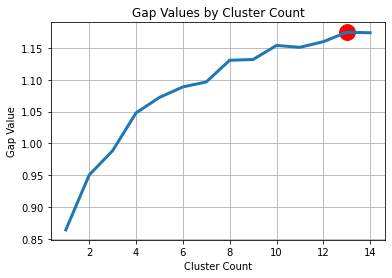

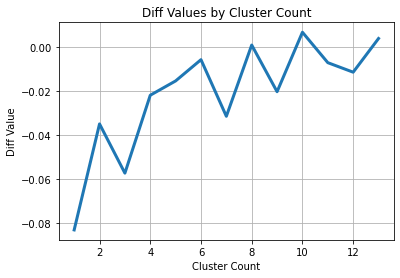

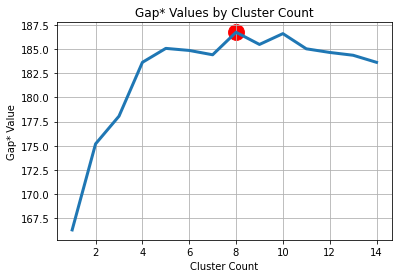

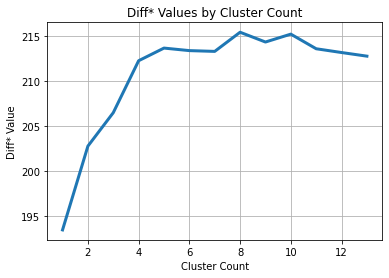

In [12]:
optimalK.plot_results()

In [13]:
# using the best K = 8 for k-means
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=8, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(norm_data)

y_km

array([5, 3, 5, 4, 3, 5, 7, 5, 5, 2, 1, 2, 7, 2, 2, 2, 7, 7, 5, 2, 5, 2,
       5, 4, 4, 3, 5, 3, 5, 2, 3, 3, 5, 3, 6, 6, 6, 5, 2, 1, 4, 3, 6, 2,
       7, 7, 5, 7, 7, 5, 7, 5, 3, 7, 5, 7, 7, 6, 7, 4, 6, 2, 7, 5, 6, 7,
       1, 3, 3, 3, 5, 2, 3, 3, 0, 5, 3, 5, 1, 5, 0, 3, 7, 2, 7, 3, 3, 0,
       1, 2, 1, 1, 2, 1, 1, 1, 6, 0, 1, 0, 1, 1, 2, 4, 4, 0, 0, 0, 2, 5,
       3, 6, 3, 3, 3, 7, 7, 3, 5, 4, 6, 2, 2, 3, 5, 1, 3, 3, 5, 0, 1, 0,
       0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 3, 3, 5, 1, 0, 0, 0, 2, 2, 2, 7, 3,
       7, 1, 2, 5, 7, 2, 2, 2, 7, 7, 2, 3, 1, 1, 2, 2, 2, 2, 2, 5, 2, 2,
       2, 5, 5, 7, 5, 4, 2, 2, 2, 1, 1, 7, 5, 1, 2, 5, 4, 6, 4, 2, 7, 6,
       2, 4, 2], dtype=int32)

In [20]:

## create a array that assign each sentence to its group
groups = []

for i in range (0, 8):
    groups.append([])

groups  

[[], [], [], [], [], [], [], []]

In [21]:
for idx, embed in enumerate(norm_data):
    groups[y_km[idx] - 1].append(idx)

In [22]:
# validate
group0 = 0
for x in y_km:
    if x == 1:
        group0 += 1

len(groups[0]) == group0

True

In [23]:
groups[0]

[10,
 39,
 66,
 78,
 88,
 90,
 91,
 93,
 94,
 95,
 98,
 100,
 101,
 125,
 130,
 145,
 155,
 166,
 167,
 185,
 186,
 189]

In [24]:
def get_sum_distances(group):
    """input a group indicis of sentences, get a list of sum of cosine distance between
    current sentence and other sentences in the text(score)
    @param: a group of index, index of sentence
    @return score(float)
    """
    # construct data for group info
    data = np.array([norm_data[i] for i in group])
    # to store the result
    res = []
    
    for idx, _ in enumerate(data):
        # data has been normalized, cosine distanct can be calculated as np.dot()
        scores = np.dot(data, data[idx].T)
        res.append(np.sum(scores))
    return res

In [25]:
## pick up top score for each group

for idx, group in enumerate(groups):
    score_list = get_sum_distances(group)
    max_idx = np.argmax(score_list)
    print('Group:' + str(idx + 1) + ': \n')
    print(sentences[group[max_idx]])
    print('\n')

Group:1: 

Barbara Follet, one of the so-called "Blair Babes" elected in 1997, told researchers: "I remember some Conservatives - whenever a Labour woman got up to speak they would take their breasts - imaginary breasts - in their hands and wiggle them and say 'melons' as we spoke."


Group:2: 

The Tory co-chairman attacked Labour's six new pledges as "vacuous" and said Mr Blair was very worried voters would take revenge for his failure to deliver.


Group:3: 

It would mean paid leave would be increased to nine months by 2007, Ms Hewitt told GMTV's Sunday programme.


Group:4: 

"Obviously we have failed in that.


Group:5: 

But Edward Leigh, who is chairman of the Commons public accounts committee, warned the government would have to work hard to ensure taxpayers would get full benefit from the Dome deal.


Group:6: 

Deputy Prime Minister John Prescott said a good deal had been secured.


Group:7: 

He would not discuss reports the party repaid £500,000 to Lord Ashcroft after he p

## Remove the sentence that doesn't have too much meaning

By using Bayesian based anti-spam filter, we can identify the sentence which is not meaningful. We use a pretrained filter `antispam`

In [26]:
# ! pip install antispam

In [27]:
import antispam

filter_out = []



# apply the filter
for idx, sc in enumerate(sentences):
    is_spam = False
    try:
        is_spam = antispam.is_spam(sc)
    except:
        # bug when sentence is too short
        print('Error during handling:' + str(idx))
    # filter out short sentence: len <= 10    
    if(len(sc) <= 10):
            is_spam = True
    if(is_spam):
        filter_out.append(idx)
        
filter_out

[0, 8, 39, 88, 93, 120, 142, 164, 165]

In [28]:
## create new groups (after filter)
new_groups = []

for i in range (0, 8):
    new_groups.append([])

new_groups  

[[], [], [], [], [], [], [], []]

In [29]:
for idx, embed in enumerate(norm_data):
    if(idx not in filter_out):
        new_groups[y_km[idx] - 1].append(idx)
        
new_groups

[[10,
  66,
  78,
  90,
  91,
  94,
  95,
  98,
  100,
  101,
  125,
  130,
  145,
  155,
  166,
  167,
  185,
  186,
  189],
 [9,
  11,
  13,
  14,
  15,
  19,
  21,
  29,
  38,
  43,
  61,
  71,
  83,
  89,
  92,
  102,
  108,
  121,
  122,
  149,
  150,
  151,
  156,
  159,
  160,
  161,
  168,
  169,
  170,
  171,
  172,
  174,
  175,
  176,
  182,
  183,
  184,
  190,
  195,
  198,
  200],
 [1,
  4,
  25,
  27,
  30,
  31,
  33,
  41,
  52,
  67,
  68,
  69,
  72,
  73,
  76,
  81,
  85,
  86,
  110,
  112,
  113,
  114,
  117,
  123,
  126,
  127,
  143,
  153],
 [3, 23, 24, 40, 59, 103, 104, 119, 134, 138, 140, 181, 192, 194, 199],
 [2,
  5,
  7,
  18,
  20,
  22,
  26,
  28,
  32,
  37,
  46,
  49,
  51,
  54,
  63,
  70,
  75,
  77,
  79,
  109,
  118,
  124,
  128,
  144,
  157,
  173,
  177,
  178,
  180,
  188,
  191],
 [34, 35, 36, 42, 57, 60, 64, 96, 111, 193, 197],
 [6,
  12,
  16,
  17,
  44,
  45,
  47,
  48,
  50,
  53,
  55,
  56,
  58,
  62,
  65,
  82,
  84,
  115,

In [30]:
## pick up top score for each group

for idx, group in enumerate(new_groups):
    score_list = get_sum_distances(group)
    max_idx = np.argmax(score_list)
    print('Group:' + str(idx + 1) + ': \n')
    print(sentences[group[max_idx]])
    print('\n')

Group:1: 

Liberal Democrat Sarah Teather, the most recent female MP to be elected, told researchers: "Lots of people say it's like an old boys club.


Group:2: 

The Tory co-chairman attacked Labour's six new pledges as "vacuous" and said Mr Blair was very worried voters would take revenge for his failure to deliver.


Group:3: 

It would mean paid leave would be increased to nine months by 2007, Ms Hewitt told GMTV's Sunday programme.


Group:4: 

"Obviously we have failed in that.


Group:5: 

But Edward Leigh, who is chairman of the Commons public accounts committee, warned the government would have to work hard to ensure taxpayers would get full benefit from the Dome deal.


Group:6: 

Deputy Prime Minister John Prescott said a good deal had been secured.


Group:7: 

He would not discuss reports the party repaid £500,000 to Lord Ashcroft after he predicted an election defeat.


Group:8: 

Research conducted by the EOC last year revealed that many Britons believe the pay gap betwe

In [ ]:
# show titles again
titles

In [31]:
## print out avg sentences long in each group
for idx, group in enumerate(new_groups):
    # number of sentence in each group
    count = 0
    # total len in each group
    sen_len =0
    for se in group:
        count += 1
        sen_len += len(sentences[se])
    print('Group:' + str(idx + 1) + ': \n')
    print('Avg length:' + str(sen_len // count))
    print('\n')

Group:1: 

Avg length:122


Group:2: 

Avg length:137


Group:3: 

Avg length:122


Group:4: 

Avg length:52


Group:5: 

Avg length:100


Group:6: 

Avg length:126


Group:7: 

Avg length:131


Group:8: 

Avg length:141


